In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data.xlsx')
df.head(10)

,Rainfall,TEMP,SP,MSL,RH,WS,Date
0,0.0,14.374065,99140.83854,101617.3915,93.514997,2.25011,'01-Jan-2015 00:00:00'
1,0.0,14.818018,99163.36372,101640.2439,93.256243,2.19044,'01-Jan-2015 01:00:00'
2,0.0,16.641992,99178.13715,101658.2231,85.977553,3.16192,'01-Jan-2015 02:00:00'
3,0.0,18.964037,99197.33333,101680.9149,76.903802,4.31571,'01-Jan-2015 03:00:00'
4,0.0,21.165504,99137.30295,101625.3394,68.965210,5.93686,'01-Jan-2015 04:00:00'
5,0.0,22.999170,99070.71875,101558.0104,60.469484,6.97116,'01-Jan-2015 05:00:00'
6,0.0,24.966109,99044.87500,101534.5625,49.530170,6.73566,'01-Jan-2015 06:00:00'
7,0.0,25.909509,99012.51563,101492.2726,43.844705,7.52980,'01-Jan-2015 07:00:00'
8,0.0,26.263581,99004.92882,101486.1892,41.256538,7.21297,'01-Jan-2015 08:00:00'
9,0.0,26.057506,99007.41493,101490.6415,40.622854,6.50183,'01-Jan-2015 09:00:00'


In [3]:
df.shape

(52608, 7)

In [4]:
df.dtypes

Rainfall    float64
TEMP        float64
SP          float64
MSL         float64
RH          float64
WS          float64
Date         object
dtype: object

In [5]:
from datetime import datetime as dt

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date']

0       2015-01-01 00:00:00
1       2015-01-01 01:00:00
2       2015-01-01 02:00:00
3       2015-01-01 03:00:00
4       2015-01-01 04:00:00
                ...        
52603   2020-12-31 19:00:00
52604   2020-12-31 20:00:00
52605   2020-12-31 21:00:00
52606   2020-12-31 22:00:00
52607   2020-12-31 23:00:00
Name: Date, Length: 52608, dtype: datetime64[ns]

In [8]:
df.tail(10)

,Rainfall,TEMP,SP,MSL,RH,WS,Date
52598,0.0,17.410872,98946.80556,101441.7865,80.452693,2.76215,2020-12-31 14:00:00
52599,0.0,16.424510,98976.41493,101469.4505,86.276801,1.74297,2020-12-31 15:00:00
52600,0.0,15.595263,98939.71094,101435.4609,89.327345,1.45467,2020-12-31 16:00:00
52601,0.0,14.953136,98959.25000,101453.8750,90.632584,1.70458,2020-12-31 17:00:00
52602,0.0,14.083690,99027.14931,101520.1476,90.850188,2.33442,2020-12-31 18:00:00
52603,0.0,13.599885,99032.73958,101525.5573,91.862406,2.24524,2020-12-31 19:00:00
52604,0.0,12.854652,99036.80990,101527.0321,94.201948,1.85252,2020-12-31 20:00:00
52605,0.0,12.251408,99044.98090,101533.7769,95.319614,1.70464,2020-12-31 21:00:00
52606,0.0,11.777351,99094.09896,101589.2899,95.811616,1.60243,2020-12-31 22:00:00
52607,0.0,11.441071,99147.31424,101642.9948,96.151408,1.63749,2020-12-31 23:00:00


In [9]:
features = df.iloc[:, 1:-1]

In [10]:
target = df['Rainfall']

In [11]:
features

,TEMP,SP,MSL,RH,WS
0,14.374065,99140.83854,101617.3915,93.514997,2.25011
1,14.818018,99163.36372,101640.2439,93.256243,2.19044
2,16.641992,99178.13715,101658.2231,85.977553,3.16192
3,18.964037,99197.33333,101680.9149,76.903802,4.31571
4,21.165504,99137.30295,101625.3394,68.965210,5.93686
...,...,...,...,...,...
52603,13.599885,99032.73958,101525.5573,91.862406,2.24524
52604,12.854652,99036.80990,101527.0321,94.201948,1.85252
52605,12.251408,99044.98090,101533.7769,95.319614,1.70464
52606,11.777351,99094.09896,101589.2899,95.811616,1.60243


In [12]:
target

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
52603    0.0
52604    0.0
52605    0.0
52606    0.0
52607    0.0
Name: Rainfall, Length: 52608, dtype: float64

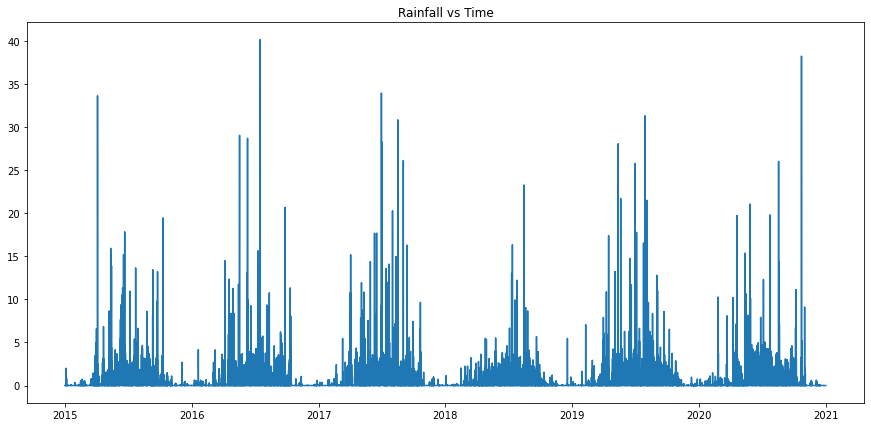

In [13]:
plt.figure(figsize=(15, 7))
plt.title('Rainfall vs Time')
plt.plot(df['Date'].values, df['Rainfall'].values)

##Seasonality

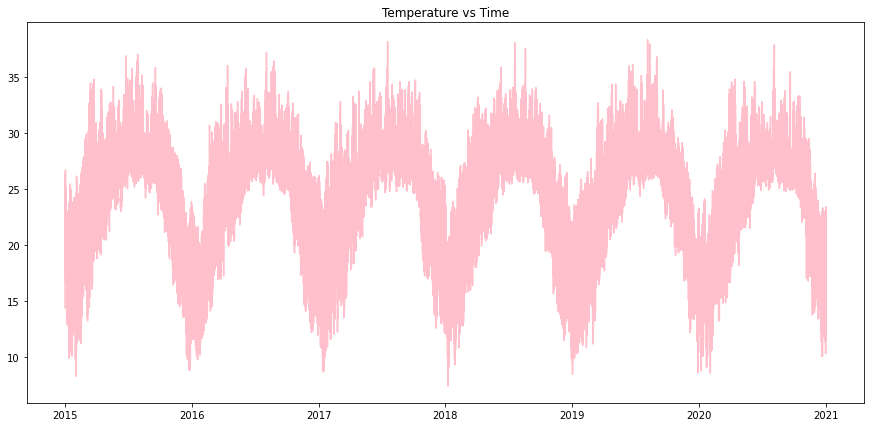

In [14]:
plt.figure(figsize=(15, 7))
plt.title('Temperature vs Time')
plt.plot(df['Date'].values, df['TEMP'].values, c='pink')

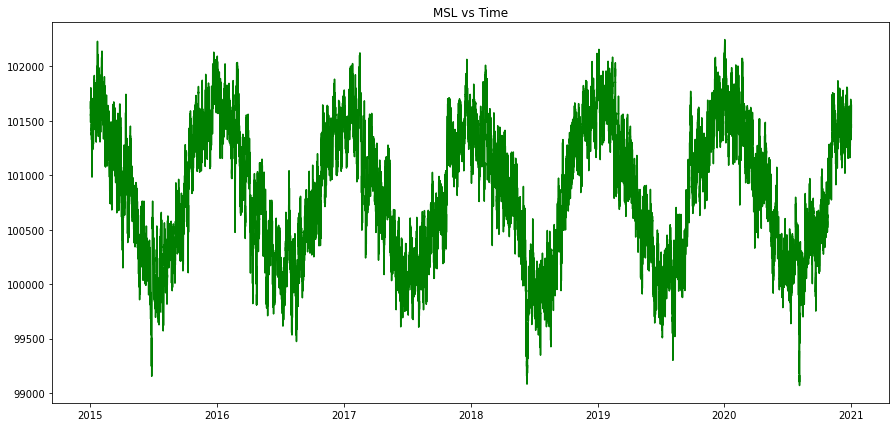

In [15]:
plt.figure(figsize=(15, 7))
plt.title('MSL vs Time')
plt.plot(df['Date'].values, df['MSL'].values, c='g')

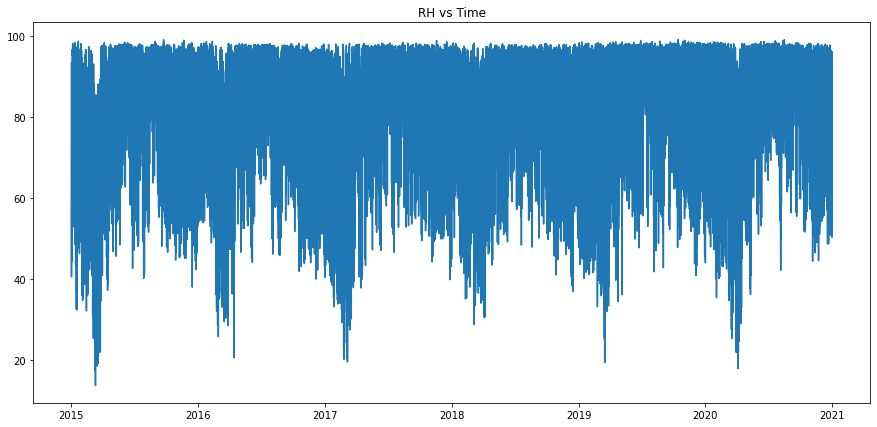

In [16]:
plt.figure(figsize=(15, 7))
plt.title('RH vs Time')
plt.plot(df['Date'].values, df['RH'].values )

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaling = StandardScaler()

In [19]:
scaled_features = pd.DataFrame(scaling.fit_transform(features))

In [20]:
columns = ['Temp','SP', 'MSL', 'RH', 'WS']
scaled_features. columns = columns

In [21]:
scaled_features['Date'] = df['Date']

In [22]:
scaled_features.head(10)

,Temp,SP,MSL,RH,WS,Date
0,-1.886178,1.347777,1.288644,0.702036,-0.617196,2015-01-01 00:00:00
1,-1.800098,1.388782,1.327279,0.686216,-0.643152,2015-01-01 01:00:00
2,-1.446440,1.415675,1.357675,0.241215,-0.220569,2015-01-01 02:00:00
3,-0.996208,1.450620,1.396038,-0.313532,0.281317,2015-01-01 03:00:00
4,-0.569356,1.341341,1.302081,-0.798878,0.986500,2015-01-01 04:00:00
5,-0.213818,1.220132,1.188254,-1.318287,1.436409,2015-01-01 05:00:00
6,0.167561,1.173086,1.148613,-1.987090,1.333969,2015-01-01 06:00:00
7,0.350481,1.114180,1.077117,-2.334685,1.679411,2015-01-01 07:00:00
8,0.419133,1.100369,1.066832,-2.492920,1.541593,2015-01-01 08:00:00
9,0.379176,1.104894,1.074359,-2.531662,1.232255,2015-01-01 09:00:00


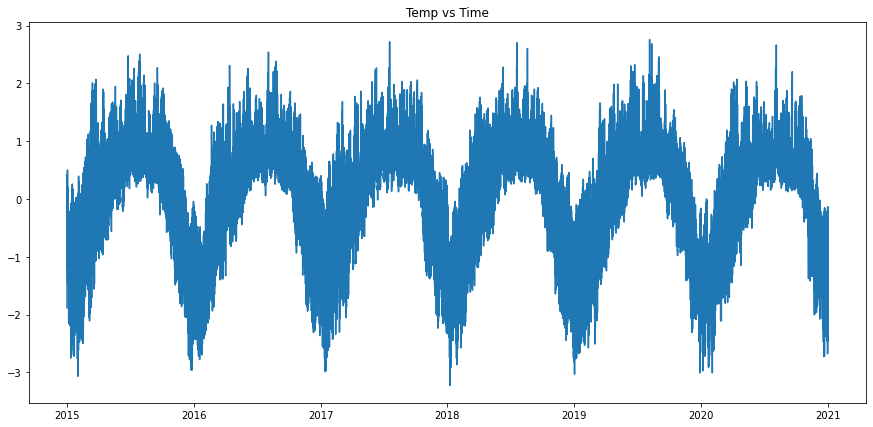

In [23]:
plt.figure(figsize=(15, 7))
plt.title('Temp vs Time')
plt.plot( df['Date'].values,scaled_features['Temp'].values)

signal is noisy

so we use wavelet preprocessing